In [1]:
!pip install matplotlib

In [2]:
!pip install pandas

In [3]:
!pip install scikit-learn

In [4]:
!pip install tabulate

In [101]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

In [103]:
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [104]:
df_chennai_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [105]:
df_chennai_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [106]:
df_chennai_processed.drop('Date',axis=1,inplace=True)

In [107]:
df_chennai_processed = df_chennai_processed.astype(float)

In [108]:
features = df_chennai_processed.drop(columns='RainTomorrow', axis=1)
Y = df_chennai_processed['RainTomorrow']

In [109]:
#regression
x_train, x_test, y_train, y_test = train_test_split( features,Y, test_size=0.2, random_state=10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2616, 66) (2616,)
Test set: (655, 66) (655,)


In [110]:
LinearReg = LinearRegression()
x = np.asanyarray(x_train)
y = np.asanyarray(y_train)
LinearReg.fit (x, y)
# The coefficients
print ('Coefficients: ', LinearReg.coef_)

Coefficients:  [-2.36946709e-02  1.30528498e-02  7.30741811e-04  6.48086479e-03
 -3.51665228e-02  4.23576504e-03  1.83177620e-03  7.91415854e-04
  9.59311783e-04  8.55637076e-03  7.70190836e-03 -9.24845557e-03
 -8.86878011e-03  1.00413073e-02  1.44858937e-02 -3.54592115e-03
 -7.74520021e+10 -7.74520021e+10  2.11152148e+09  2.11152148e+09
  2.11152148e+09  2.11152148e+09  2.11152148e+09  2.11152148e+09
  2.11152148e+09  2.11152148e+09  2.11152148e+09  2.11152148e+09
  2.11152148e+09  2.11152148e+09  2.11152148e+09  2.11152148e+09
  2.11152148e+09  2.11152148e+09  7.65756278e+09  7.65756278e+09
  7.65756278e+09  7.65756278e+09  7.65756278e+09  7.65756278e+09
  7.65756278e+09  7.65756278e+09  7.65756278e+09  7.65756278e+09
  7.65756278e+09  7.65756278e+09  7.65756278e+09  7.65756278e+09
  7.65756278e+09  7.65756278e+09 -9.48859411e+09 -9.48859411e+09
 -9.48859411e+09 -9.48859411e+09 -9.48859411e+09 -9.48859411e+09
 -9.48859411e+09 -9.48859411e+09 -9.48859411e+09 -9.48859411e+09
 -9.488594

In [111]:
predictions = LinearReg.predict(x_test)
x = np.asanyarray(x_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((predictions - y) ** 2))

Residual sum of squares: 0.12


C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [112]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % LinearReg.score(x, y))

Variance score: 0.43


In [113]:
from sklearn.metrics import r2_score
LinearRegression_MAE = np.mean(np.absolute(predictions - y_test))
LinearRegression_MSE = np.mean((predictions -y_test)**2)
LinearRegression_R2 = r2_score(y_test, predictions)
print("Mean absolute error: %.2f" % LinearRegression_MAE)
print("Residual sum of squares (MSE): %.2f" % LinearRegression_MSE)
print("R2-score: %.2f" % LinearRegression_R2 )

Mean absolute error: 0.26
Residual sum of squares (MSE): 0.12
R2-score: 0.43


In [114]:
dict = {'error_type':['LinearRegression_MAE','LinearRegression_MSE','LinearRegression_R2'],
        
        'value':[LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]}

In [115]:
from tabulate import tabulate
Report = pd.DataFrame(dict)
print(tabulate(Report, headers = 'keys', tablefmt = 'psql'))

+----+----------------------+----------+
|    | error_type           |    value |
|----+----------------------+----------|
|  0 | LinearRegression_MAE | 0.256325 |
|  1 | LinearRegression_MSE | 0.115723 |
|  2 | LinearRegression_R2  | 0.427119 |
+----+----------------------+----------+


In [116]:
#knn
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [117]:
predictions = neigh.predict(x_test)
predictions[0:5]

array([0., 0., 1., 0., 0.])

In [118]:
KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
KNN_JaccardIndex = metrics.jaccard_score(y_test, predictions)
KNN_F1_Score = metrics.f1_score(y_test, predictions)
KNN_Log_Loss = metrics.log_loss(y_test, predictions)
print("KNN Accuracy Score: ",KNN_Accuracy_Score)
print("KNN_JaccardIndex: ",KNN_JaccardIndex)
print("KNN F1 score : ", KNN_F1_Score)
print("KNN Log Loss : ", KNN_Log_Loss)

KNN Accuracy Score:  0.8183206106870229
KNN_JaccardIndex:  0.4251207729468599
KNN F1 score :  0.5966101694915255
KNN Log Loss :  6.548388936343421


In [119]:
#regression
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size = 0.2, random_state =1)

In [120]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2616, 66) (2616,)
Test set: (655, 66) (655,)


In [121]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [122]:
predictions = LR.predict(x_test)

In [123]:
LR_Accuracy_Score = metrics.accuracy_score(y_test,predictions)
LR_JaccardIndex = metrics.jaccard_score(y_test,predictions)
LR_F1_Score = metrics.f1_score(y_test,predictions)
LR_Log_Loss = metrics.log_loss(y_test, predictions)
print("LR accuracy score: ", LR_Accuracy_Score)
print("LR JaccardIndex : ", LR_JaccardIndex)
print("LR F1 Score : ", LR_F1_Score)
print("LR Log Loss : ", LR_Log_Loss)

LR accuracy score:  0.8274809160305343
LR JaccardIndex :  0.4840182648401826
LR F1 Score :  0.6523076923076923
LR Log Loss :  6.218218065603417


In [124]:
#svm
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [125]:
predictions = SVM.predict(x_test)

In [126]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
SVM_JaccardIndex = metrics.jaccard_score(y_test, predictions)
SVM_F1_Score = metrics.f1_score(y_test, predictions)
SVM_Log_Loss = metrics.log_loss(y_test, predictions)
print("SVM accuracy score : ", SVM_Accuracy_Score)
print("SVM jaccardIndex : ", SVM_JaccardIndex)
print("SVM F1_score : ", SVM_F1_Score)
print("SVM Log Loss : ", SVM_Log_Loss)

SVM accuracy score :  0.8320610687022901
SVM jaccardIndex :  0.4954128440366973
SVM F1_score :  0.6625766871165644
SVM Log Loss :  6.0531326302334145


In [127]:
d = {'KNN':[KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score,KNN_Log_Loss],
     'LR':[LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score,LR_Log_Loss],
     'SVM':[SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score, SVM_Log_Loss]}
Report = pd.DataFrame(data=d, index = ['Accuracy','Jaccard Index','F1-Score', 'LogLoss'])
print(tabulate(Report, headers = 'keys', tablefmt = 'psql'))

+---------------+----------+----------+----------+
|               |      KNN |       LR |      SVM |
|---------------+----------+----------+----------|
| Accuracy      | 0.818321 | 0.827481 | 0.832061 |
| Jaccard Index | 0.425121 | 0.484018 | 0.495413 |
| F1-Score      | 0.59661  | 0.652308 | 0.662577 |
| LogLoss       | 6.54839  | 6.21822  | 6.05313  |
+---------------+----------+----------+----------+


In [128]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [129]:
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))

In [130]:
names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.827481
1   LR  0.825954
2  SVM  0.722137


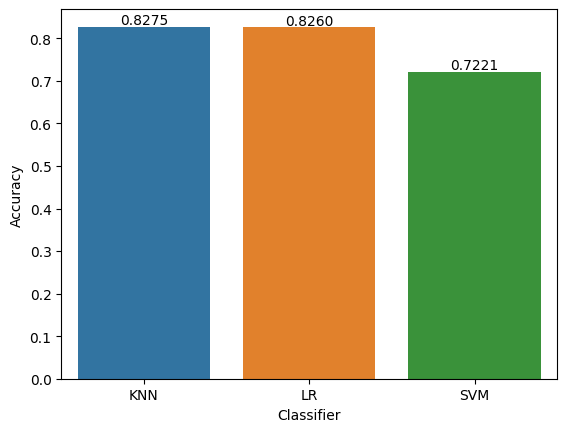

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()